# Lab 1

Name: **Elmer Canales**

Date: **March 1, 2025**

# Part 1: The Gravitional Potential of the Earth
___

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib.cm as cm
import matplotlib.colors as colors
from scipy.integrate import quad

In [36]:
def gravational_potential(M, xm, ym):
    x = 0
    y = 0
    G = 6.67e-11
    r = np.sqrt((xm - x)**2 + (ym - y)**2)
    if np.isclose(xm, x) and np.isclose(ym, y):
        G_potential = np.nan
    else:
        G_potential = - G * M / r
    return G_potential

Gravitional_Potential = np.vectorize(gravational_potential)

print("Please enter a value for the mass of the point source and xy coordinates")
print("of where you would like to calculate the gravitional potential from that point source.")
print("Note: Do not use letters (expect 'e') or spaces!")

loop = ""
while loop == "":
    # Letting user input a number for y
    user_M = input("\nEnter a value for the mass:")
    # checks for letters
    letter_checker = bool(re.search(r'[a-d-f-zA-D-F-Z]', user_M))  
    # check for spaces
    space_checker = " " in user_M
    if letter_checker == False or space_checker == False:
        user_M = float(user_M)
        break
    else:
        print("Please enter a proper input!")

while loop == "":
    # Letting user input a number for x
    user_xm = input("\nEnter a value for xm:")
    # checks for letters
    letter_checker = bool(re.search(r'[a-d-f-zA-D-F-Z]', user_xm))  
    # check for spaces
    space_checker = " " in user_xm
    if letter_checker == False or space_checker == False:
        user_xm = float(user_xm)
        break
    else:
        print("Please enter a proper input!")
        
while loop == "":
    # Letting user input a number for y
    user_ym = input("\nEnter a value for ym:")
    # checks for letters
    letter_checker = bool(re.search(r'[a-d-f-zA-D-F-Z]', user_ym))  
    # check for spaces
    space_checker = " " in user_ym
    if letter_checker == False and space_checker == False:
        user_ym = float(user_ym)
        break
    else:
        print("Please enter a proper input!")
        
GP = Gravitional_Potential(user_M, user_xm, user_ym)
        
print(f"\nYou've entered: {user_M} kg for the mass, {user_xm} for xm, and {user_ym} ym.")
print(f"Based on your inputted values, the gravitional potential is: {GP:.2e} J / kg\n")

Please enter a value for the mass of the point source and xy coordinates
of where you would like to calculate the gravitional potential from that point source.
Note: Do not use letters (expect 'e') or spaces!



Enter a value for the mass: 5e13

Enter a value for xm: 3

Enter a value for ym: 4



You've entered: 50000000000000.0 kg for the mass, 3.0 for xm, and 4.0 ym.
Based on your inputted values, the gravitional potential is: -6.67e+02 J / kg



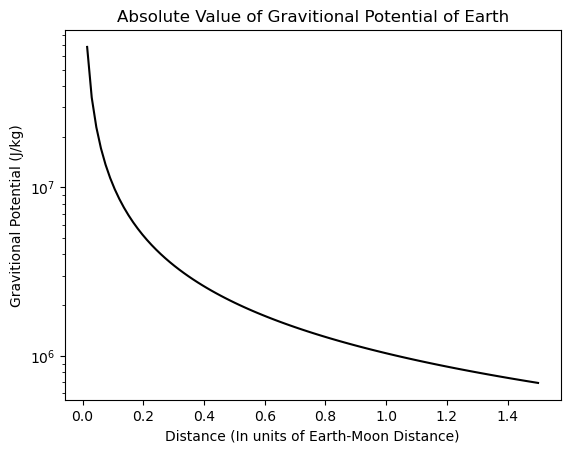

In [37]:
distance_Earth_Moon = 3.8e8
xm = np.linspace(0, 1.5, 100)         # Distance between Earth and the Moon
xm_meters = xm * distance_Earth_Moon  # Meters
y = 0
GP = Gravitional_Potential(5.9e24, xm_meters, y)

fig, ax_gp = plt.subplots(1, 1)
ax_gp.plot(xm, np.abs(GP), color = 'black')
ax_gp.set_xlabel("Distance (In units of Earth-Moon Distance)")
ax_gp.set_ylabel("Gravitional Potential (J/kg)")
ax_gp.set_title("Absolute Value of Gravitional Potential of Earth")
#ax_gp.text(1.15, 6e7, r"$\phi(r)=-\frac{GM}{r}$", fontsize = 15)
ax_gp.set_yscale("log")

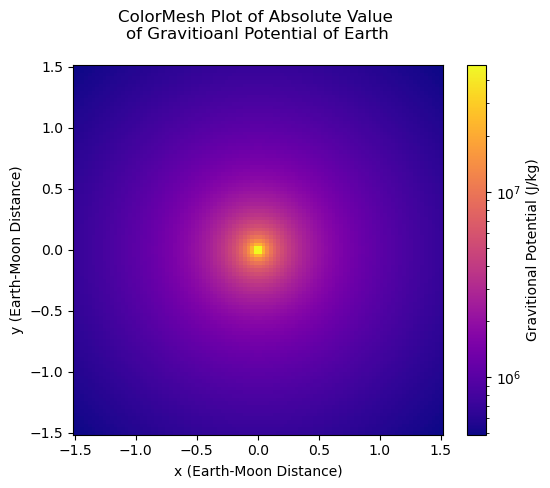

In [40]:
xm = np.linspace(-1.5, 1.5, 100)         # Distance between Earth and the Moon
xm_meters = xm * distance_Earth_Moon     # Meters
ym = np.linspace(-1.5, 1.5, 100)         # Distance between Earth and the Moon
ym_meters = ym * distance_Earth_Moon     # Meters

grid_xm_meters, grid_ym_meters = np.meshgrid(xm_meters, ym_meters)
grid_xm, grid_ym = np.meshgrid(xm, ym)
GP = Gravitional_Potential(5.9e24, grid_xm_meters, grid_ym_meters)

fig, ax_gp_cm = plt.subplots(1, 1)
add_color = ax_gp_cm.pcolormesh(grid_xm, grid_ym, np.abs(GP), cmap = cm.plasma, norm = colors.LogNorm(vmin = np.abs(GP).min(), vmax = np.abs(GP).max()))
ax_gp_cm.set_xlabel('x (Earth-Moon Distance)')
ax_gp_cm.set_ylabel("y (Earth-Moon Distance)")
ax_gp_cm.set_title("ColorMesh Plot of Absolute Value \nof Gravitioanl Potential of Earth\n")
ax_gp_cm.set_aspect("equal")

cbar = fig.colorbar(add_color)
cbar.set_label("Gravitional Potential (J/kg)")

# Part 2: The Gravitional Potential of the Earth-Moon System
___

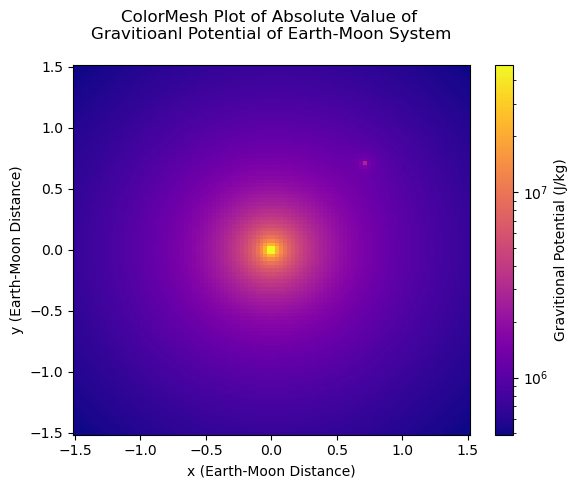

In [41]:
def gravational_potential_Earth(xm, ym):
    x = 0
    y = 0
    G = 6.67e-11
    M = 5.9e24
    r = np.sqrt((xm - x)**2 + (ym - y)**2)
    if np.isclose(xm, x) and np.isclose(ym, y):
        G_potential = np.nan
    else:
        G_potential = - G * M / r
    return G_potential
Gravitional_Potential_Earth = np.vectorize(gravational_potential_Earth)

def gravational_potential_Moon(xm, ym):
    x = (3.8e8) / np.sqrt(2)
    y = (3.8e8) / np.sqrt(2)
    G = 6.67e-11
    M = 7.3e22
    r = np.sqrt((xm - x)**2 + (ym - y)**2)
    if np.isclose(xm, x) and np.isclose(ym, y):
        G_potential = np.nan
    else:
        G_potential = - (G * M) / r
    return G_potential
Gravitional_Potential_Moon = np.vectorize(gravational_potential_Moon)

xm = np.linspace(-1.5, 1.5, 100)         # Distance between Earth and the Moon
xm_meters = xm * distance_Earth_Moon     # Meters
ym = np.linspace(-1.5, 1.5, 100)         # Distance between Earth and the Moon
ym_meters = ym * distance_Earth_Moon     # Meters

grid_xm_meters, grid_ym_meters = np.meshgrid(xm_meters, ym_meters)
grid_xm, grid_ym = np.meshgrid(xm, ym)

GP_Earth = Gravitional_Potential_Earth(grid_xm_meters, grid_ym_meters)
GP_Moon = Gravitional_Potential_Moon(grid_xm_meters, grid_ym_meters)
GP_combine = np.abs(GP_Earth) + np.abs(GP_Moon)

fig, ax_gp_cm = plt.subplots(1, 1)
add_color1 = ax_gp_cm.pcolormesh(grid_xm, grid_ym, GP_combine, cmap = cm.plasma, norm = colors.LogNorm(vmin = GP_combine.min(), vmax = GP_combine.max()))
ax_gp_cm.set_xlabel('x (Earth-Moon Distance)')
ax_gp_cm.set_ylabel("y (Earth-Moon Distance)")
ax_gp_cm.set_title("ColorMesh Plot of Absolute Value of \nGravitioanl Potential of Earth-Moon System\n")

cbar = fig.colorbar(add_color1)
cbar.set_label("Gravitional Potential (J/kg)")

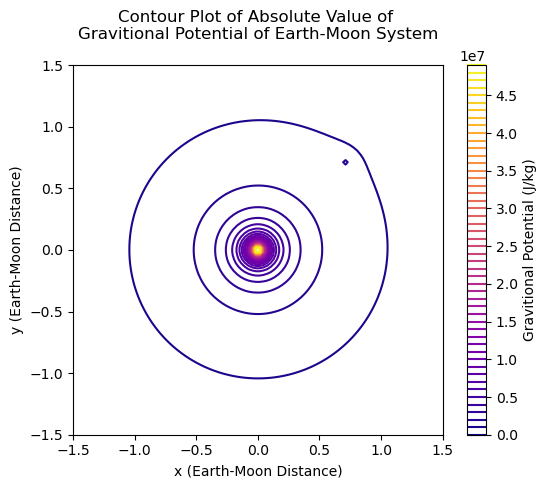

In [43]:
color_contour = np.log(GP_combine)
fig_contour, ax_gp_contour = plt.subplots(1, 1)
add_color2 = ax_gp_contour.contour(grid_xm, grid_ym, GP_combine, cmap = cm.plasma, levels = 50)
ax_gp_contour.set_xlabel('x (Earth-Moon Distance)')
ax_gp_contour.set_ylabel("y (Earth-Moon Distance)")
ax_gp_contour.set_title("Contour Plot of Absolute Value of \nGravitional Potential of Earth-Moon System\n")
ax_gp_contour.set_aspect("equal")

cbar = fig.colorbar(add_color2)
cbar.set_label("Gravitional Potential (J/kg)")

# Part 3: The Gravitional Force Field of the Earth-Moon System
___

In [33]:
def g_force(m1, m2, x1, y1, x2, y2):
    G = 6.67e-11
    M = m1 * m2
    if np.isclose(x1, x2) and np.isclose(y1, y2):
        Fx = np.nan
        Fy = np.nan
        return Fx, Fy
    else:
        r_squared = (np.sqrt((x1 - x2)**2 + (y1 - y2) **2))**2
        vector_r = np.array([x1 - x2, y1 - y2])
        vector_r_hat = vector_r / np.linalg.norm(vector_r)
        Fx = - (G * M / r_squared) * vector_r_hat[0]
        Fy = - (G * M / r_squared) * vector_r_hat[1]
    return Fx, Fy
gravitional_force = np.vectorize(g_force)

loop = ""
while loop == "":
    user_m1 = input("\nEnter a value for the M1 (in kg):")
    user_m2 = input("Enter a value for the m2 (in kg):")
    
    user_x1 = input("\nEnter a value for the x1:")
    user_y1 = input("Enter a value for the y1:")
    
    user_x2 = input("\nEnter a value for the x2:")
    user_y2 = input("Enter a value for the y2:")
    
    # checks for letters
    letter_checker1 = bool(re.search(r'[a-d-f-zA-D-F-Z]', user_m1))
    letter_checker2 = bool(re.search(r'[a-d-f-zA-D-F-Z]', user_m2))
    letter_checker3 = bool(re.search(r'[a-d-f-zA-D-F-Z]', user_x1))
    letter_checker4 = bool(re.search(r'[a-d-f-zA-D-F-Z]', user_x2))
    letter_checker5 = bool(re.search(r'[a-d-f-zA-D-F-Z]', user_y1))
    letter_checker6 = bool(re.search(r'[a-d-f-zA-D-F-Z]', user_y2))
    letter_checker = np.array([letter_checker1, letter_checker2, letter_checker3, letter_checker4, letter_checker5, letter_checker6])
    # check for spaces
    space_checker1 = " " in user_m1
    space_checker2 = " " in user_m2
    space_checker3 = " " in user_x1
    space_checker4 = " " in user_x2
    space_checker5 = " " in user_y1
    space_checker6 = " " in user_y2
    space_checker = np.array([space_checker1, space_checker2, space_checker3, space_checker4, space_checker5, space_checker6])
    if np.any(letter_checker) == False and np.any(space_checker) == False:
        user_m1 = float(user_m1)
        user_m2 = float(user_m2)
        user_x1 = float(user_x1)
        user_x2 = float(user_x2)
        user_y1 = float(user_y1)
        user_y2 = float(user_y2)
        break
    else:
        print("Error! You have entered an invalid value for one of the variables!")
        
print(f"You have entered the following values:\nM1 = {user_m1}\nm2 = {user_m2}\nx1 = {user_x1}\nx2 = {user_y1}\ny1 = {user_x2}\ny2 = {user_y2}")
Fx, Fy = gravitional_force(user_m1, user_m2, user_x1, user_y1, user_x2, user_y2)
print(f"\nThe gravitional force between the two objects is {Fx:.2e} N for Fx and {Fy:.2e} N for Fy.")


Enter a value for the M1 (in kg): 6
Enter a value for the m2 (in kg): 6

Enter a value for the x1: 1
Enter a value for the y1: 2

Enter a value for the x2: 3
Enter a value for the y2: 4


You have entered the following values:
M1 = 6.0
m2 = 6.0
x1 = 1.0
x2 = 2.0
y1 = 3.0
y2 = 4.0

The gravitional force between the two objects is 2.12e-10 N for Fx and 2.12e-10 N for Fy.


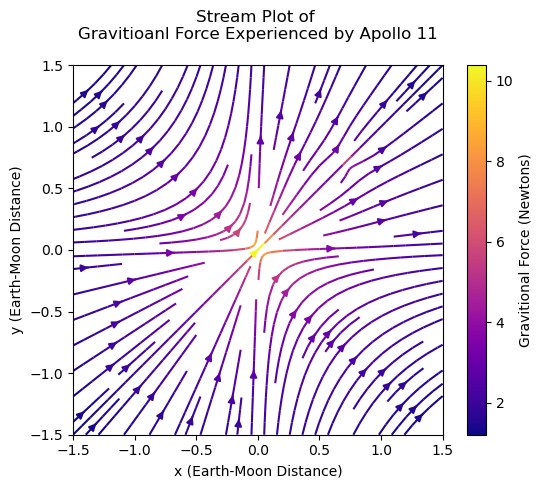

In [34]:
m_Earth = 5.9e24    # Mass of Earth
m_Moon = 7.3e22     # Mass of Moon
m_Apollo = 5500     # Mass of Apollo 11 Command Module

x_Earth = 0
y_Earth = 0

x_Moon = distance_Earth_Moon / np.sqrt(2)
y_Moon = distance_Earth_Moon / np.sqrt(2)

x_Apollo = np.linspace(-1.5, 1.5, 100)               # Distance between Earth and the Moon
x_Apollo_meters = x_Apollo * distance_Earth_Moon     # Meters
y_Apollo = np.linspace(-1.5, 1.5, 100)               # Distance between Earth and the Moon
y_Apollo_meters = y_Apollo * distance_Earth_Moon     # Meters

grid_x_Apollo_meters, grid_y_Apollo_meters = np.meshgrid(x_Apollo_meters, y_Apollo_meters)
grid_x_Apollo, grid_y_Apollo = np.meshgrid(x_Apollo, y_Apollo)

GFx_Earth_Apollo, GFy_Earth_Apollo = np.abs(gravitional_force(m_Earth, m_Apollo, x_Earth, y_Earth, grid_x_Apollo_meters, grid_y_Apollo_meters))
GFx_Moon_Apollo, GFy_Moon_Apollo = np.abs(gravitional_force(m_Moon, m_Apollo, x_Moon, y_Moon, grid_x_Apollo_meters, grid_y_Apollo_meters))

GFx_total = GFx_Earth_Apollo + GFx_Moon_Apollo
GFy_total = GFy_Earth_Apollo + GFy_Moon_Apollo

colors = np.log(np.hypot(GFx_total, GFy_total))

fig, ax_gf_stream = plt.subplots(1, 1)
stream = ax_gf_stream.streamplot(grid_x_Apollo, grid_y_Apollo, GFx_total, GFy_total, color = colors, cmap = cm.plasma, density = 1)
ax_gf_stream.set_xlabel('x (Earth-Moon Distance)')
ax_gf_stream.set_ylabel("y (Earth-Moon Distance)")
ax_gf_stream.set_title("Stream Plot of \nGravitioanl Force Experienced by Apollo 11\n")
ax_gf_stream.set_aspect("equal")

cbar = fig.colorbar(stream.lines)
cbar.set_label("Gravitional Force (Newtons)")

# Part 4: Altitude of the Saturn V Rocket
___

In [47]:
def burn_time(m0, mf, m_dot):
    T = m0 - mf / m_dot
    return T

m0 = 2.4e3    # m/s
mf = 7.5e5    # kg
m_dot = 1.3e4 #kg/s
T = burn_time(m0, mf, m_dot)

def delta_v(t):
    ve = 2.4e3     # m/s
    m0 = 2.4e3     # m/s
    m_dot = 1.3e4  # kg/s
    g = 9.81       # m^2/s
    mt = m0 - m_dot * t
    if mt <= 0:
        delta_vel = 0
    else:
        delta_vel = ve * np.log(m0 / mt) - g * t
    return delta_vel

delta_velocity = np.vectorize(delta_v)

h, err = quad(delta_v, 0, T)
print(f"The final altitude of the Saturn V after burning all its fuel is {h:.2f} +/- {err:.2f} meters.")

The final altitude of the Saturn V after burning all its fuel is 0.00 +/- 0.00 meters.
